In [38]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image

In [39]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax

In [40]:
dflog=pd.read_csv("data/01_heights_weights_genders.csv")
dflog.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


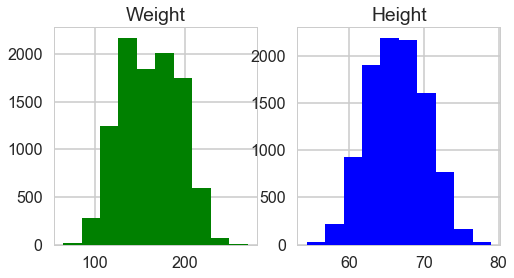

In [41]:
fig,axes=plt.subplots(figsize=(8,4),nrows=1,ncols=2)
axes[0].hist(dflog.Weight,color='g')
axes[1].hist(dflog.Height,color='b')

axes[0].set_title('Weight')
axes[1].set_title('Height')

In [42]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
c=[c0,c2]

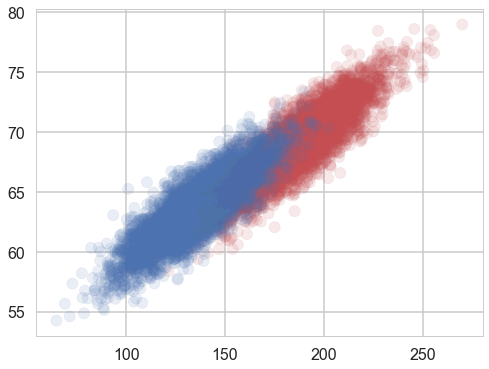

In [44]:
fig = plt.figure(figsize=(8,6))
plt.scatter(dflog.Weight,dflog.Height,c=[c[i] for i in dflog.Gender=='Male'],alpha=0.12)

In [45]:
colors=[c0,c2]

In [46]:
zip(dflog['Gender'].unique(), colors)

[('Male', (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)),
 ('Female', (0.7686274509803922, 0.3058823529411765, 0.3215686274509804))]

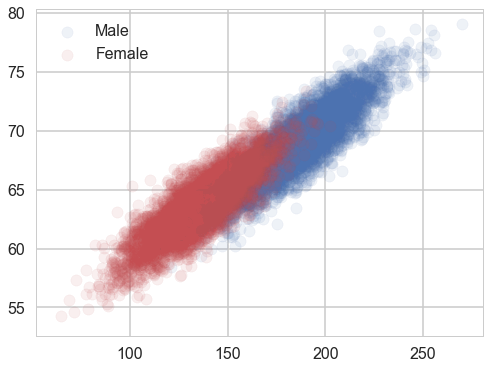

In [47]:
fig = plt.figure(figsize=(8,6))
colors = [c0, c2]
for label, color in zip(dflog['Gender'].unique(), colors):
    mask = dflog['Gender']==label
    plt.scatter(dflog[mask].Weight,dflog[mask].Height, c=color, label=label,alpha=0.09)
plt.legend()

In [48]:
from sklearn.cross_validation import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, (dflog.Gender=="Male").values)

In [49]:
#L2 Ridge logistic-with-Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
clfl2=LogisticRegression(penalty='l2')
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 0.001},
 0.9184,
 [mean: 0.91747, std: 0.00506, params: {'C': 0.0001},
  mean: 0.91840, std: 0.00735, params: {'C': 0.001},
  mean: 0.91800, std: 0.00734, params: {'C': 0.1},
  mean: 0.91800, std: 0.00734, params: {'C': 1},
  mean: 0.91800, std: 0.00734, params: {'C': 10},
  mean: 0.91800, std: 0.00734, params: {'C': 100}])

In [50]:
fitmodel.best_params_

{'C': 0.001}

In [51]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
accuracy_score(ypred2, ytestlr)

0.92159999999999997

In [52]:
# Lasso L1 logistic-with-lasso
from sklearn.linear_model import LogisticRegression
clfl1 = LogisticRegression(penalty="l1")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl1, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 1},
 0.9188,
 [mean: 0.91867, std: 0.00646, params: {'C': 0.001},
  mean: 0.91813, std: 0.00748, params: {'C': 0.01},
  mean: 0.91800, std: 0.00744, params: {'C': 0.1},
  mean: 0.91880, std: 0.00661, params: {'C': 1},
  mean: 0.91667, std: 0.00499, params: {'C': 10},
  mean: 0.91613, std: 0.00548, params: {'C': 100}])

In [53]:
clfl1_b=LogisticRegression(penalty='l1',C=fitmodel.best_params_['C'])
clfl1_b.fit(Xlr, ylr)
ypred1_b=clfl1_b.predict(Xtestlr)
accuracy_score(ypred1_b, ytestlr)

0.9204

## PCA and KNN

In [54]:
data=np.load("data/imag.pix.npy")
y=np.load("data/imag.lbl.npy")
STANDARD_SIZE = (322, 137)#standardized pixels in image.
data.shape, y.shape

((87L, 132342L), (87L,))

In [55]:
def get_image(mat):
    size = STANDARD_SIZE[0]*STANDARD_SIZE[1]*3
    r,g,b = mat[0:size:3], mat[1:size:3],mat[2:size:3]
    rgbArray = np.zeros((STANDARD_SIZE[1],STANDARD_SIZE[0], 3), 'uint8')#3 channels
    rgbArray[..., 0] = r.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 1] = b.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    rgbArray[..., 2] = g.reshape((STANDARD_SIZE[1], STANDARD_SIZE[0]))
    return rgbArray

def display_image(mat):
    with sns.axes_style("white"):
        plt.imshow(get_image(mat))
        plt.xticks([])
        plt.yticks([])

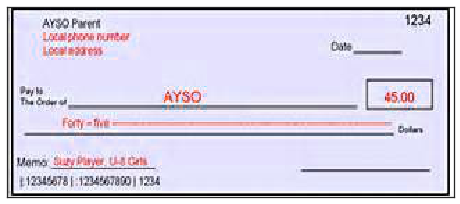

In [56]:
plt.figure(figsize=(8,8))
display_image(data[5])

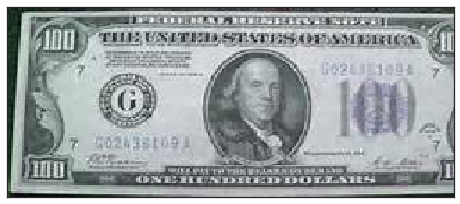

In [57]:
plt.figure(figsize=(8,8))
display_image(data[78])

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
X = pca.fit_transform(data)

In [59]:
print pca.explained_variance_ratio_.sum()

0.942351428567


In [60]:
pca.components_[0]

array([-0.00137942, -0.00164105, -0.00188562, ..., -0.00164061,
       -0.00181242, -0.00208118])

In [61]:
pca.explained_variance_ratio_*100

array([ 35.92596698,   6.29318801,   4.10778347,   3.11950952,
         2.81695972,   2.28831619,   2.10127947,   1.87404974,
         1.73264635,   1.53023756,   1.42159658,   1.3183937 ,
         1.24701496,   1.16381642,   1.09958273,   1.06072655,
         1.0074289 ,   0.98023773,   0.96055684,   0.91534743,
         0.90185212,   0.85211922,   0.8367429 ,   0.79690704,
         0.75487097,   0.72498073,   0.70819408,   0.67961299,
         0.6608505 ,   0.64760336,   0.62727662,   0.59469037,
         0.58287798,   0.57420503,   0.57258912,   0.55220557,
         0.53814108,   0.53273018,   0.51638586,   0.4932743 ,
         0.48550929,   0.47708965,   0.47209918,   0.45538056,
         0.44322157,   0.43975042,   0.43357555,   0.42599158,
         0.42085226,   0.40738539,   0.40390615,   0.39164444,
         0.3875251 ,   0.3820919 ,   0.37670256,   0.36135681,
         0.35322453,   0.34822876,   0.33344319,   0.32341509])

In [62]:
df = pd.DataFrame({"y":y, "label":np.where(y==1, "check", "dollar")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]
df.head()

,label,y,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48,pc49,pc50,pc51,pc52,pc53,pc54,pc55,pc56,pc57,pc58,pc59,pc60
0,check,1,-22536.362571,-2428.344363,-2133.774450,-328.334505,-1065.231537,79.747436,-425.004984,622.461423,-2490.210484,-858.210950,-1072.485051,277.194323,-1116.288481,711.763054,-786.971594,411.826468,-194.437333,471.551311,-429.399703,-605.451691,-591.363616,-263.551598,-988.758774,951.052472,1034.843594,577.955758,-46.315800,-104.494341,-532.749483,536.029811,-651.011718,72.718109,-740.861741,1211.877187,739.858492,-81.010918,462.483062,289.110405,-242.893119,54.557707,-470.312818,764.153082,458.634756,-417.256870,475.746657,-271.996869,-91.668054,376.984963,-677.374018,-354.878607,-516.131768,-313.893642,372.352096,-47.817920,-85.410182,-201.310221,-706.924413,93.490282,822.330146,-19.363744
1,check,1,-22226.658684,-709.255956,-288.825312,-1300.644037,-792.080289,217.449193,1076.725299,-2115.103744,-875.436477,-1124.378483,-343.204703,-43.199611,548.285301,356.460262,-1760.708714,-374.895288,815.230396,292.614233,-942.006018,159.390868,-1123.655718,514.492754,-816.453846,719.501363,288.362237,-110.752499,813.284532,1157.396055,-364.934349,98.471503,-866.347916,591.402797,326.654807,163.222529,736.703488,-627.526950,-94.478815,-210.828762,-122.773482,-360.304540,127.282290,55.675246,628.057674,43.269886,325.165332,31.467515,-117.225764,495.280257,1117.194355,310.652689,-465.589915,-100.174570,192.270212,357.971761,584.911426,-265.159850,-592.333286,266.372426,593.448400,102.908773
2,check,1,-17364.260784,-4252.027449,793.801418,-1362.065785,-374.228439,3142.089415,2514.208349,1443.833534,-121.126487,-419.378523,-2083.431515,1718.089714,-722.606447,-1240.432114,-309.911833,-1061.571659,1386.389111,-800.361386,-2597.732771,-875.869185,3382.171019,-388.272505,-3416.577409,1336.734026,-4751.854017,1048.400990,2191.453403,-680.081425,1370.499861,-2153.747821,-667.898009,1677.218047,1818.705961,-3188.848017,527.088422,2227.234153,-3428.600973,2738.912486,879.397450,294.225363,1709.079897,-2840.333648,3862.706179,1554.508254,958.973516,580.842346,-940.293768,-1060.627334,-282.282432,-2952.846317,-2094.487396,1449.457077,1731.690026,-2134.342214,-1685.626823,-2403.385261,-648.119959,-874.683565,995.253784,1425.004805
3,check,1,-22847.256200,-900.591394,577.206097,-180.293755,-733.142356,-108.008546,1441.985215,-1070.141445,845.235059,-1391.504315,1471.494113,-725.840325,-578.594800,-255.611329,930.424858,173.535196,-302.729874,874.703216,-182.484302,1228.582586,556.608847,-188.842019,-331.511875,-378.350898,-940.057174,172.921975,1337.026305,49.770953,-273.217464,-404.459566,-141.930823,-90.990913,51.545592,722.786614,190.718010,596.890966,374.525420,404.485955,96.850762,-422.332606,1478.905673,-844.085654,-816.129910,683.251867,316.331224,-526.926920,-725.136724,-287.474173,-869.399741,-1837.824235,233.608100,152.868857,323.014159,-707.344144,167.353608,892.968336,-743.745307,-507.956292,-381.962293,-218.915475
4,check,1,-15868.672595,3259.492328,506.796478,-919.629006,2166.541145,-981.607471,-1669.671269,-391.405360,1735.839576,163.153521,-1626.892969,-556.315839,-864.212997,1722.033541,942.983553,-1130.722582,2137.138526,767.052811,-1095.479190,596.948100,-28.748820,80.205044,-501.212074,1111.216413,335.345106,-1236.814676,-702.554911,-721.252849,-130.353130,-919.787232,1030.963875,-3623.921466,2168.587605,-3410.295559,620.438688,-2143.562579,1816.096826,2285.493593,2592.557772,-435.631299,258.872647,1528.620484,1132.793598,-1407.486274,-315.990609,-943.215954,420.064427,948.592595,3419.345235,938.548426,-971.929095,2145.817120,729.426907,-645.576868,3819.427171,1375.524176,1804.573566,-2257.273620,167.795976,2573.901645


In [63]:
def normit(a):
    a=(a - a.min())/(a.max() -a.min())
    a=a*256
    return np.round(a)
def getNC(pc, j):
    size=322*137*3
    r=pc.components_[j][0:size:3]
    g=pc.components_[j][1:size:3]
    b=pc.components_[j][2:size:3]
    r=normit(r)
    g=normit(g)
    b=normit(b)
    return r,g,b
def display_component(pc, j):
    r,g,b = getNC(pc,j)
    rgbArray = np.zeros((137,322,3), 'uint8')
    rgbArray[..., 0] = r.reshape(137,322)
    rgbArray[..., 1] = g.reshape(137,322)
    rgbArray[..., 2] = b.reshape(137,322)
    plt.imshow(rgbArray)
    plt.xticks([])
    plt.yticks([])

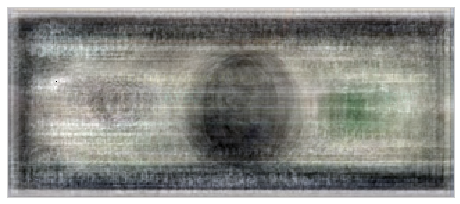

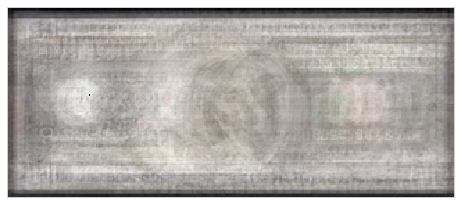

In [64]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
display_component(pca,0)

plt.figure(figsize=(8,8))
plt.subplot(2,1,2)
display_component(pca,1)

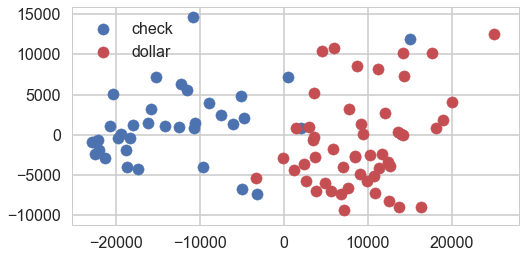

In [65]:
plt.figure(figsize=(8,4))
colors = [c0, c2]
for label, color in zip(df['label'].unique(), colors):
    mask = df['label']==label
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()

### KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
ys=df['y'].astype(int).values
subdf=df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values

In [67]:

def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print "BEST PARAMS", gs.best_params_
    best = gs.best_estimator_
    return best

In [68]:
from sklearn.cross_validation import train_test_split
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    return clf, Xtrain, ytrain, Xtest, ytest

In [69]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'n_neighbors': 3}
Accuracy on training data: 0.97
Accuracy on test data:     0.83


In [70]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[10,  0],
       [ 3,  5]])

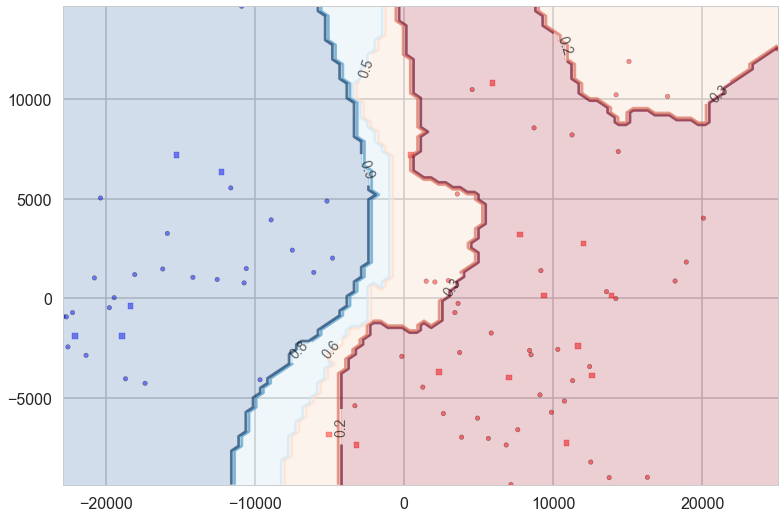

In [71]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

In [75]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression('l1'),
                                             {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'C': 0.001}
Accuracy on training data: 0.97
Accuracy on test data:     0.94


In [76]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[8, 0],
       [1, 9]])

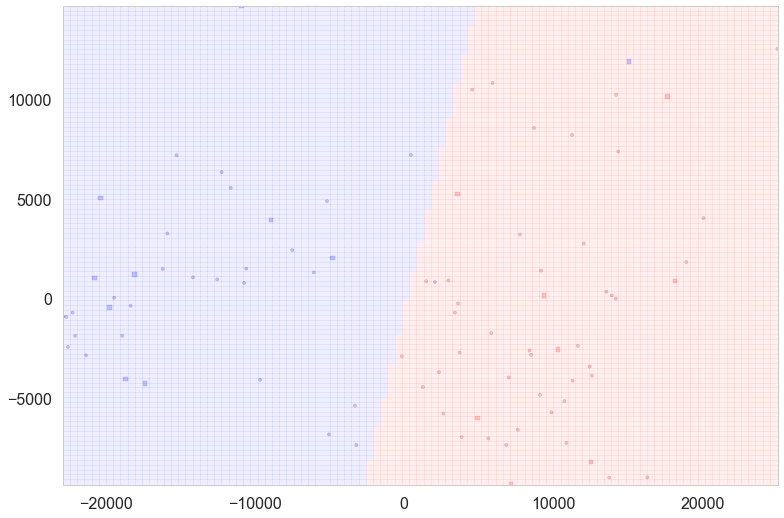

In [78]:
plt.figure()
ax=plt.gca()
points_plot(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.2);

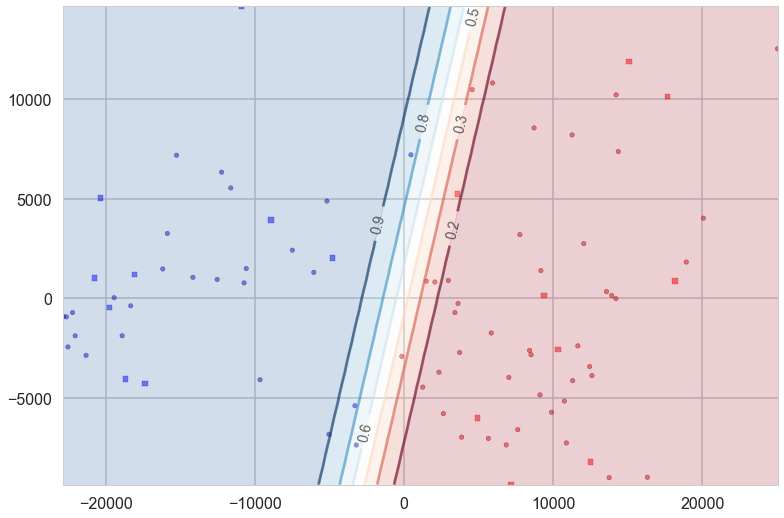

In [79]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);

In [80]:
bestcv, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression('l2'),
                                             {"C": [0.001, 0.01, 0.1, 1, 10, 100]}, df, ['pc1','pc2'], 'label', 'check' )

BEST PARAMS {'C': 0.001}
Accuracy on training data: 0.94
Accuracy on test data:     0.83


In [81]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, bestcv.predict(Xtest), )

array([[13,  1],
       [ 2,  2]])

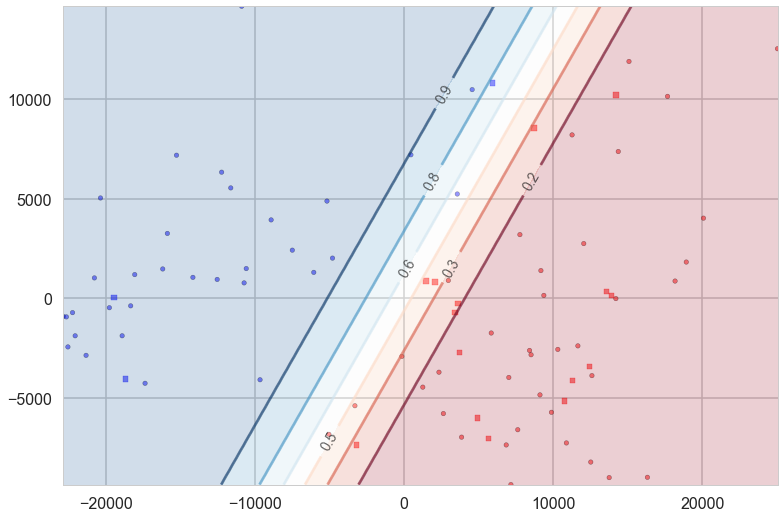

In [82]:
plt.figure()
ax=plt.gca()
points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, bestcv, alpha=0.5, psize=20);